In [41]:
#first import the library which is required for the project like numpy ,pandas ,scikit-learn
#for ploting purpose of  data some portion i used matplotlib and for data visualization i used seaborn library



#for model I use RandomForestClassifier,AdaBoostClassifier,LogisticRegression,naive_bayes ,

# I made an differnet file for RandomForestClassifier (RandomForest2.ipynb).There I use RandomForestClassifier better way.
#I didnot use KNeighborsClassifier
#some library i am not using but I imported it for future use 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
%matplotlib inline



In [42]:
#first read the dataset using pandas 
df = pd.read_csv('Churn_dataset.csv')

In [43]:
#check how many rows and columns are there
df.shape

(9789, 11)

In [44]:
#check first 14 line of data but I couldn't see any differnece in data (in Churn column).So I checked for 50 line  
df.head(14)

,ID,DOB,Plan,LastMonthlyBill,LastpaidAmount,Occupation,IncomeLevel,Gender,SubscriberJoinDate,"LastSatisfactionSurveyScore(1=V.Poor, 5=V.High)",Churn
0,19,29/12/74,B,41,20,NaN,Low,M,15/1/17,1,No
1,88,11/1/23,B,32,20,NaN,High,M,15/1/17,4,No
2,130,3/1/54,D,60,20,NaN,Medium,F,30/7/14,5,No
3,227,12/1/20,F,37,20,Business,Low,M,3/10/13,1,No
4,294,26/12/84,F,66,20,Government,High,F,21/3/16,2,No
5,394,2/1/58,D,50,20,IT,Medium,M,30/7/14,3,No
6,423,26/12/85,D,56,20,Medical,Low,M,21/3/16,1,No
7,438,8/1/34,F,101,20,Finance,Medium,F,3/10/13,4,No
8,669,24/12/94,F,132,20,Sales,Low,F,26/5/15,4,No
9,726,8/1/34,D,81,20,IT,Low,F,21/3/16,5,No


In [45]:
#Now i can see some difernece.
df.head(50)

,ID,DOB,Plan,LastMonthlyBill,LastpaidAmount,Occupation,IncomeLevel,Gender,SubscriberJoinDate,"LastSatisfactionSurveyScore(1=V.Poor, 5=V.High)",Churn
0,19,29/12/74,B,41,20,NaN,Low,M,15/1/17,1,No
1,88,11/1/23,B,32,20,NaN,High,M,15/1/17,4,No
2,130,3/1/54,D,60,20,NaN,Medium,F,30/7/14,5,No
3,227,12/1/20,F,37,20,Business,Low,M,3/10/13,1,No
4,294,26/12/84,F,66,20,Government,High,F,21/3/16,2,No
5,394,2/1/58,D,50,20,IT,Medium,M,30/7/14,3,No
6,423,26/12/85,D,56,20,Medical,Low,M,21/3/16,1,No
7,438,8/1/34,F,101,20,Finance,Medium,F,3/10/13,4,No
8,669,24/12/94,F,132,20,Sales,Low,F,26/5/15,4,No
9,726,8/1/34,D,81,20,IT,Low,F,21/3/16,5,No


In [46]:
# #my first task is to basic exploratory analysis to get a better understanding of what is in our data.

# How much data we have
# If there are any missing values
# What data type each column is
# The distribution of data in each column

# To check some missing values are there or not, so there are 9789 column but I am seeing in only four column which has full data 
# means not null.
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

('Number of rows: ', 9789)


,ID,LastMonthlyBill,LastpaidAmount,"LastSatisfactionSurveyScore(1=V.Poor, 5=V.High)"
Count of values,9789.0,9789.0,9789.0,9789.0


In [47]:
#t know how many type of plan is available
df2 = pd.DataFrame(df["Plan"]) #  Interim DF only - Attr
names1 = df2.columns.values
print names1
print df2.shape 
print df2["Plan"].value_counts()

['Plan']
(9789, 1)
A    1702
E    1663
D    1616
C    1611
F    1599
B    1598
Name: Plan, dtype: int64


In [48]:
#to know how many types occupation are there
df2 = pd.DataFrame(df["Occupation"]) 
names1 = df2.columns.values
print names1
print df2.shape 
print df2["Occupation"].value_counts()

['Occupation']
(9789, 1)
IT            1286
Sales         1250
Engineer      1210
Government    1205
Others        1193
Medical       1191
Finance       1139
Business      1111
Name: Occupation, dtype: int64


In [49]:
#to know the score are given and the occurence 
df2 = pd.DataFrame(df["LastSatisfactionSurveyScore(1=V.Poor, 5=V.High)"]) 
names1 = df2.columns.values
print names1
print df2.shape 
print df2["LastSatisfactionSurveyScore(1=V.Poor, 5=V.High)"].value_counts()

['LastSatisfactionSurveyScore(1=V.Poor, 5=V.High)']
(9789, 1)
5    1992
4    1975
1    1942
2    1941
3    1939
Name: LastSatisfactionSurveyScore(1=V.Poor, 5=V.High), dtype: int64


In [50]:
#to how many yes and NO are there .  I think here 'NO' and 'No' are same.
df2 = pd.DataFrame(df["Churn"]) 
names1 = df2.columns.values
print names1
print df2.shape 
print df2["Churn"].value_counts()

['Churn']
(9789, 1)
No     8208
Yes    1521
NO       60
Name: Churn, dtype: int64


In [51]:
#to check the how many SubscriberJoinDate are there . 
df2 = pd.DataFrame(df["SubscriberJoinDate"]) 
names1 = df2.columns.values
print names1
print df2.shape 
print df2["SubscriberJoinDate"].value_counts()

['SubscriberJoinDate']
(9789, 1)
15/1/17    2035
30/7/14    1984
21/3/16    1980
3/10/13    1923
26/5/15    1867
Name: SubscriberJoinDate, dtype: int64


In [52]:
#now we can convert this feature as number like #male=,female:2 and subscriber joining date according to month like '15/1/17':11
# this converting task I have done for best fit in our model.
mymap = {'Yes':1,'No':0,'NO':'0',' ':0,'IT':8,'Sales':7,'Engineer':6,'Government':5,'Others':4,'Medical':3,'Finance':2,'Business':1,
         'A':6,'E':5,'D':4,'C':3,'F':2,'B':1,'M':1,'Low':1,'Medium':2,'High':3,'15/1/17':11,'30/7/14':40,'21/3/16':20,
         '3/10/13':50,'26/5/15':30} 

df1 =df.applymap(lambda s: mymap.get(s) if s in mymap else s)

# now we have to fill the missing value with 0
#here I ignore ID,DOB,Gender columns. we will do same for ID,DOB,Gender column in below. because I change DOB to AGE in next step.
df1['Occupation'].fillna(0, inplace=True)
df1['LastMonthlyBill'].fillna(0, inplace=True)
df1['Plan'].fillna(0, inplace=True)
df1['LastpaidAmount'].fillna(0, inplace=True)
df1['IncomeLevel'].fillna(0, inplace=True)
df1['SubscriberJoinDate'].fillna(0, inplace=True)
df1['LastSatisfactionSurveyScore(1=V.Poor, 5=V.High)'].fillna(0, inplace=True)
df1['Churn'].fillna(0, inplace=True)
df1.head(50)

,ID,DOB,Plan,LastMonthlyBill,LastpaidAmount,Occupation,IncomeLevel,Gender,SubscriberJoinDate,"LastSatisfactionSurveyScore(1=V.Poor, 5=V.High)",Churn
0,19,29/12/74,1,41,20,0.0,1.0,1.0,11,1,0
1,88,11/1/23,1,32,20,0.0,3.0,1.0,11,4,0
2,130,3/1/54,4,60,20,0.0,2.0,2.0,40,5,0
3,227,12/1/20,2,37,20,1.0,1.0,1.0,50,1,0
4,294,26/12/84,2,66,20,5.0,3.0,2.0,20,2,0
5,394,2/1/58,4,50,20,8.0,2.0,1.0,40,3,0
6,423,26/12/85,4,56,20,3.0,1.0,1.0,20,1,0
7,438,8/1/34,2,101,20,2.0,2.0,2.0,50,4,0
8,669,24/12/94,2,132,20,7.0,1.0,2.0,30,4,0
9,726,8/1/34,4,81,20,8.0,1.0,2.0,20,5,0


In [53]:
#now we convert DOB to age manually  and rename the column DOB to AGE and also rename the 
#LastSatisfactionSurveyScore(1=V.Poor, 5=V.High) to LastSatisfactionSurveyScore .I have done manually form DOB to age because 
#there are some  age which is like 19/01/01 ,so I don't understand  it is 19/01/2001 or 19/01/1901.because there are some DOB 
# which is like 19/01/1875.I have written code for DOB to age changes(dob.txt) but for some date it is not working .
mymap = {'22/12/01':16 ,'6/1/43':75 ,'6/1/44':74 ,'29/12/74':43,'30/12/69':48,'12/1/18':100 ,
         '11/1/24':94,'24/12/92' :25 ,'30/12/70':47,'2/1/60':58 ,'4/1/49':69 ,'1/1/62':56,'6/1/42': 76,'29/12/72':45,
          '26/12/84':33,'5/1/48':68,
         '27/12/80':37,'12/1/19': 99,'24/12/94' :23,'6/1/41':77, '11/1/21':97,'3/1/53':65,'7/1/37':81,'31/12/67':50,
         '2/1/59':59,'25/12/90':27,'10/1/26' :92,'11/1/23':95,'9/1/31':87,'3/1/55':63,'26/12/87': 30,'5/1/45':73,
         '3/1/54':64,'26/12/85':32, '8/1/34':84,'3/1/56':62,'27/12/82':35,'22/12/02':15,'29/12/75':42,'8/1/36':82,
         '10/1/25':93,'7/1/38':80,'24/12/93':24,'25/12/91':26,'9/1/32':86,'1/1/63':55,'26/12/86':31,'10/1/27':91,'10/1/27':91,
         '5/1/47':71,'31/12/66':51,'4/1/52':66,'4/1/51':67,'9/1/29':89,'8/1/33':85,'8/1/35':83,        
         '2/1/58':60,'24/12/95':22, '28/12/79':38,'7/1/39':79 ,'25/12/89':28, '22/12/00':17,'23/12/98':19,'2/1/57':61,  
         '23/12/97':20, '31/12/65':52, '1/1/61':57,'27/12/83':34,'31/12/64':53,'23/12/99':18, '7/1/40':78,
         '9/1/30':88,        
         '1/1/64':54,        
         '5/1/46':72,        
         '30/12/68':49,      
         '28/12/78':39,      
         '29/12/73':44,      
         '11/1/22':96,       
         '23/12/96':21,      
         '10/1/28':90,        
         '4/1/50':68,         
         '12/1/20':98,        
         '30/12/71':46,       
         '28/12/77':40,       
         '28/12/76':39,       
         '25/12/88':29,       
         '27/12/81':36,       
         '27/12/18':99,        
         '31/12/17':100,        
         '12/1/1875':143,       
         '30/12/1869': 148} 

df1 =df1.applymap(lambda s: mymap.get(s) if s in mymap else s)
df1=df1.rename(index=str, columns={'DOB':'AGE','LastSatisfactionSurveyScore(1=V.Poor, 5=V.High)':'LastSatisfactionSurveyScore'})
#
df1.head(50)

#now finally we convert all the feature value  to number to make prediction easy

,ID,AGE,Plan,LastMonthlyBill,LastpaidAmount,Occupation,IncomeLevel,Gender,SubscriberJoinDate,LastSatisfactionSurveyScore,Churn
0,19,43,1,41,20,0.0,1.0,1.0,11,1,0
1,88,95,1,32,20,0.0,3.0,1.0,11,4,0
2,130,64,4,60,20,0.0,2.0,2.0,40,5,0
3,227,98,2,37,20,1.0,1.0,1.0,50,1,0
4,294,33,2,66,20,5.0,3.0,2.0,20,2,0
5,394,60,4,50,20,8.0,2.0,1.0,40,3,0
6,423,32,4,56,20,3.0,1.0,1.0,20,1,0
7,438,84,2,101,20,2.0,2.0,2.0,50,4,0
8,669,23,2,132,20,7.0,1.0,2.0,30,4,0
9,726,84,4,81,20,8.0,1.0,2.0,20,5,0


In [54]:
#Now we have to check missing values are there or not because in above code I filled the missing values with 0.but stillin gender 
#field some missing value are there.because I did not do that operation for Gender column.
print("Number of rows: ", df1.shape[0])
counts = df1.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)
df1.columns

('Number of rows: ', 9789)


,ID,AGE,Plan,LastMonthlyBill,LastpaidAmount,Occupation,IncomeLevel,Gender,SubscriberJoinDate,LastSatisfactionSurveyScore
Count of values,9789.0,9789.0,9789.0,9789.0,9789.0,9789.0,9789.0,9755.0,9789.0,9789.0


Index([u'ID', u'AGE', u'Plan', u'LastMonthlyBill', u'LastpaidAmount',
       u'Occupation', u'IncomeLevel', u'Gender', u'SubscriberJoinDate',
       u'LastSatisfactionSurveyScore', u'Churn'],
      dtype='object')

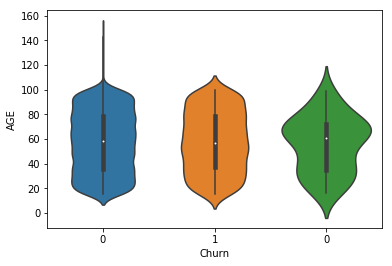

In [55]:
#now we have to underastand our data so,
#I have to compare with churn with every feature.For that  I use seaborn library. 
#source (https://seaborn.pydata.org/generated/seaborn.violinplot.html)

sns.violinplot(df1.Churn, df1.AGE)



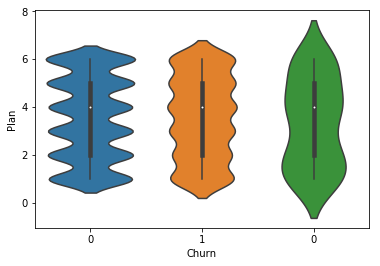

In [56]:
sns.violinplot(df1.Churn, df1.Plan)

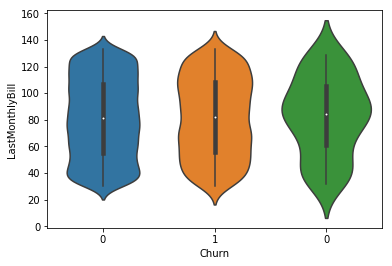

In [57]:
sns.violinplot(df1.Churn, df1.LastMonthlyBill)


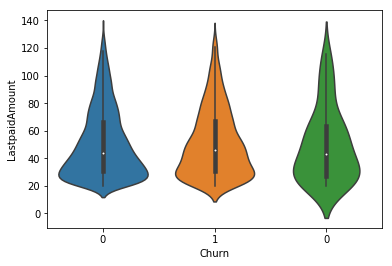

In [58]:
sns.violinplot(df1.Churn, df1.LastpaidAmount)

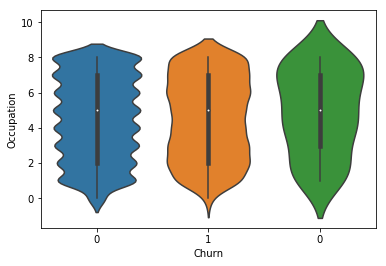

In [59]:
sns.violinplot(df1.Churn, df1.Occupation)

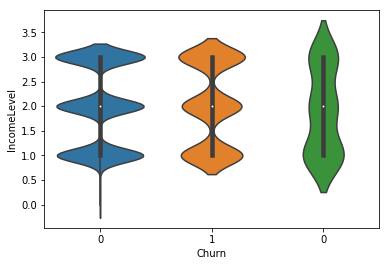

In [60]:
sns.violinplot(df1.Churn, df1.IncomeLevel)

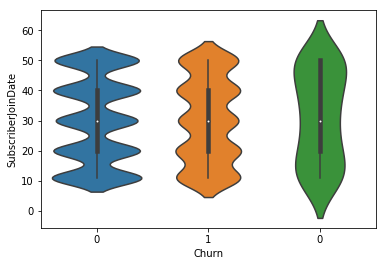

In [61]:
sns.violinplot(df1.Churn, df1.SubscriberJoinDate)

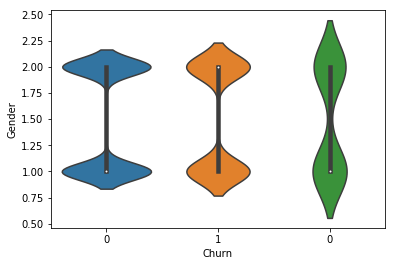

In [62]:
sns.violinplot(df1.Churn, df1.Gender)

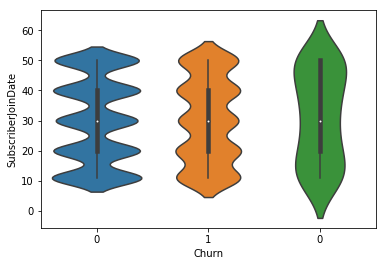

In [63]:
sns.violinplot(df1.Churn, df1.SubscriberJoinDate)

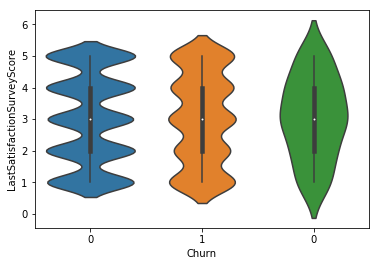

In [64]:
sns.violinplot(df1.Churn, df1.LastSatisfactionSurveyScore)

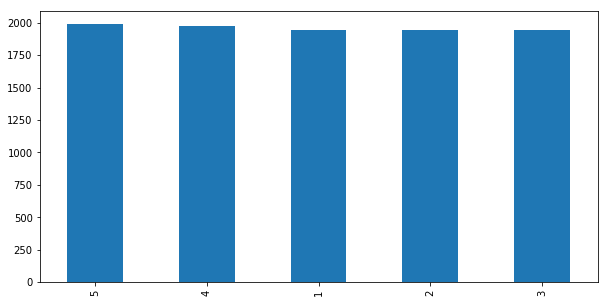

In [65]:
#I use matplotlib for better understanding of data
df1.LastSatisfactionSurveyScore.value_counts().plot(kind='bar', figsize = (10, 5))

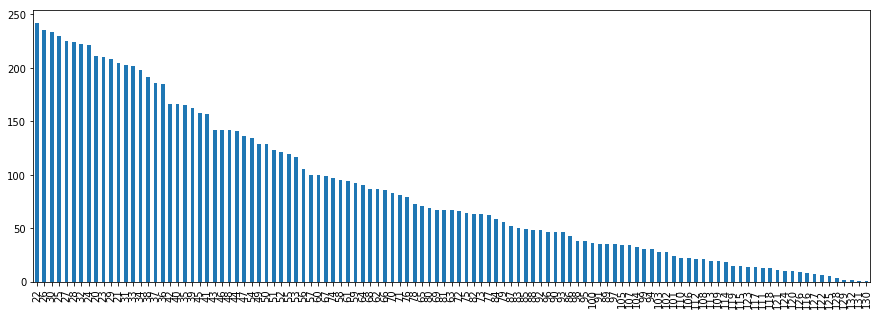

In [74]:
df1.LastpaidAmount.value_counts().plot(kind='bar', figsize = (15, 5))

In [67]:
print df1.dtypes
#so now we convert the datatype in same data type to fit in our model.
#here you can see three four field are there which has different data type so i convert it to int64.
#and also In previous code we said that we have to fill the missing values for three colum ID,AGE ,Gender.
df1['ID'].fillna(0, inplace=True)
df1['AGE'].fillna(0, inplace=True)
df1['Gender'].fillna(0, inplace=True)
# sum(df1['Churn'].isnull())
# df1['Plan']=(df1['Plan'].isnull()).astype(np.float64, copy=False)
# df1['LastMonthlyBill']=(df1['LastMonthlyBill'].isnull()).astype(np.float64, copy=False)
# df1['LastpaidAmount']=(df1['LastpaidAmount'].isnull()).astype(np.float64, copy=False)
# df1['SubscriberJoinDate']=(df1['SubscriberJoinDate'].isnull()).astype(np.float64, copy=False)
# df1['LastSatisfactionSurveyScore']=(df1['LastSatisfactionSurveyScore'].isnull()).astype(np.float64, copy=False)
# df1['Churn']=(df1['Churn'].isnull()).astype(np.float64, copy=False)
df1['Occupation'] = df1['Occupation'].astype(np.int64)
df1['IncomeLevel'] = df1['IncomeLevel'].astype(np.int64)
df1['Gender'] = df1['Gender'].astype(np.int64)
df1['Churn'] = df1['Churn'].astype(np.int64)


print df1.dtypes
df1.head(50)


ID                               int64
AGE                              int64
Plan                             int64
LastMonthlyBill                  int64
LastpaidAmount                   int64
Occupation                     float64
IncomeLevel                    float64
Gender                         float64
SubscriberJoinDate               int64
LastSatisfactionSurveyScore      int64
Churn                           object
dtype: object
ID                             int64
AGE                            int64
Plan                           int64
LastMonthlyBill                int64
LastpaidAmount                 int64
Occupation                     int64
IncomeLevel                    int64
Gender                         int64
SubscriberJoinDate             int64
LastSatisfactionSurveyScore    int64
Churn                          int64
dtype: object


,ID,AGE,Plan,LastMonthlyBill,LastpaidAmount,Occupation,IncomeLevel,Gender,SubscriberJoinDate,LastSatisfactionSurveyScore,Churn
0,19,43,1,41,20,0,1,1,11,1,0
1,88,95,1,32,20,0,3,1,11,4,0
2,130,64,4,60,20,0,2,2,40,5,0
3,227,98,2,37,20,1,1,1,50,1,0
4,294,33,2,66,20,5,3,2,20,2,0
5,394,60,4,50,20,8,2,1,40,3,0
6,423,32,4,56,20,3,1,1,20,1,0
7,438,84,2,101,20,2,2,2,50,4,0
8,669,23,2,132,20,7,1,2,30,4,0
9,726,84,4,81,20,8,1,2,20,5,0


In [68]:
#So here I choosed the best feature(according to data) for our model and features values are in X and target value in y.  
features_1 = ['LastMonthlyBill','LastpaidAmount','IncomeLevel','SubscriberJoinDate','LastSatisfactionSurveyScore']
X = df1[features_1].values
y = df1['Churn'].values
y=y.astype('int')
#now we split tha data into train and test so I use "sklearn.model_selection" library 
#to split the data into train(80%) and test(20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [30]:
#I use  random_forest classsifier model to make prediction. 
#source 1. http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/
#source 2. https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1
#souce 3.  https://chrisalbon.com/machine-learning/random_forest_classifier_example_scikit.html
def random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=40)
    model.fit(X_train, y_train)
    # predict class labels for the test set (Churn = True, Not Churn = False)
    predicted = model.predict(X_test)
    # generate class probabilities
    probs = model.predict_proba(X_test)
    return model, predicted, probs

In [31]:
model, predicted, probs = random_forest(X_train, X_test, y_train, y_test)

In [32]:
#my accuracy is 82%
print 'Accuracy: ', metrics.accuracy_score(y_test, predicted)
print 'Precision: ', metrics.precision_score(y_test, predicted)
print 'Recall: ', metrics.recall_score(y_test, predicted)
print 'F-1 score', metrics.f1_score(y_test, predicted)


Accuracy:  0.828907048008
Precision:  0.111111111111
Recall:  0.0130293159609
F-1 score 0.0233236151603


In [69]:
# I use logistic_regression .I am getting accuracy 84%.because in logistic regession target output should be 1 or 0.
#So i used logistic regession model
# source 1 . https://machinelearningmastery.com/logistic-regression-for-machine-learning/
# source 2. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
def logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    # predict class labels for the test set (Churn = True, Not Churn = False)
    predicted = model.predict(X_test)
    # generate class probabilities
    probs = model.predict_proba(X_test)
    return model, predicted, probs

In [70]:

model, predicted, probs = logistic_regression(X_train, X_test, y_train, y_test)

In [71]:
print 'Accuracy: ', metrics.accuracy_score(y_test, predicted)


Accuracy:  0.85240040858


In [36]:
# I have seen in stack over flow that I can use AdaBoostClassifier also 
def ada_boost(X_train, X_test, y_train, y_test):
    model = AdaBoostClassifier(learning_rate = 0.1, n_estimators=37)
    model.fit(X_train, y_train)
    # predict class labels for the test set (Churn = True, Not Churn = False)
    predicted = model.predict(X_test)
    # generate class probabilities
    probs = model.predict_proba(X_test)
    return model, predicted, probs

In [37]:
model, predicted, probs = ada_boost(X_train, X_test, y_train, y_test)

In [38]:
print 'Accuracy: ', metrics.accuracy_score(y_test, predicted)

Accuracy:  0.843207354443


In [72]:
# I use naive_bayes 
#source to understand 1.http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/
#source to implement http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

train, test = train_test_split(df1, test_size = 0.3)

target = train['Churn'].values
train = train.drop('Churn', 1)
train = train.values
model.fit(train, target)

expected = test['Churn'].values
test = test.drop('Churn', 1)
predicted = model.predict(test)
print("Naive Bayes Classification Accuracy", accuracy_score(expected, predicted))

('Naive Bayes Classification Accuracy', 0.83861082737487236)


In [ ]:
#we can choose support vector machine and 
#a neural network alongside our random forest and then select the best performing of them to refine